<a href="https://colab.research.google.com/github/nv-hiep/dust_scattering/blob/main/albedo_MW_Mie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Albedo for various size distributions - Milky Way - Mie scaterring**

In WD2001 models:

**Case A: variable grain volumes.**

**Case B: fixed total grain volumes.**

V_total,g = 2.3 x 10^(-27) cm^3 H^(-1)

V_total,g = 3.9 x 10^(-27) cm^3 H^(-1).

# 1. Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# !ls

Mounted at /content/gdrive


# 2. Root directory

In [ ]:
cd '/content/gdrive/My Drive/Colab Notebooks/dust'

/content/gdrive/My Drive/Colab Notebooks/dust


# 3. Import Libraries



## 3.1 Standard libraries

In [ ]:
import os
import numpy             as np
import matplotlib.pyplot as plt

%matplotlib inline  

## 3.2 Dust libraries

In [ ]:
import libs.constants    as c

from libs                import sizedist
from libs.extinction     import scattools

## 4. Set some parameters: dust mass column, energy range, wavelength range

In [ ]:
NH     = 1.e21                                # H column density [H cm^-2]
D2G    = 0.009                                # Dust-to-gas ratio
M_dust = NH * c.M_p * D2G                     # Dust mass column [g cm^-2]

# E_range    = np.logspace(-0.6, 1., 20)      # KeV, slow
E_range    = np.logspace(-4., -1., 100)      # KeV
lambda_    = c.HC / E_range                   # [cm]      
lambda_    = lambda_ / c.MICRON2CM            # [micron]
lambda_inv = 1. / lambda_                     # [um^-1]
lambda_

array([12.408     , 11.57174233, 10.79184562, 10.06451135,  9.38619697,
        8.75359871,  8.16363545,  7.61343374,  7.10031379,  6.62177641,
        6.17549084,  5.75928342,  5.371127  ,  5.00913101,  4.67153235,
        4.3566867 ,  4.0630606 ,  3.78922392,  3.53384291,  3.29567372,
        3.07355634,  2.86640893,  2.67322256,  2.49305631,  2.32503266,
        2.16833324,  2.02219484,  1.88590567,  1.75880194,  1.64026458,
        1.52971623,  1.42661848,  1.33046917,  1.2408    ,  1.15717423,
        1.07918456,  1.00645113,  0.9386197 ,  0.87535987,  0.81636355,
        0.76134337,  0.71003138,  0.66217764,  0.61754908,  0.57592834,
        0.5371127 ,  0.5009131 ,  0.46715323,  0.43566867,  0.40630606,
        0.37892239,  0.35338429,  0.32956737,  0.30735563,  0.28664089,
        0.26732226,  0.24930563,  0.23250327,  0.21683332,  0.20221948,
        0.18859057,  0.17588019,  0.16402646,  0.15297162,  0.14266185,
        0.13304692,  0.12408   ,  0.11571742,  0.10791846,  0.10

# 5. Grain scattering models

In [ ]:
RG_Drude     = scattools.create_scat_model('RG','Drude')
Mie_sil      = scattools.create_scat_model('Mie','Silicate')
Mie_gra      = scattools.create_scat_model('Mie','Graphite')
Mie_smallgra = scattools.create_scat_model('Mie','SmallGraphite')

print(RG_Drude.__dict__.keys())
print(type(RG_Drude.scat_model))
print(type(RG_Drude.cmindex_model))

dict_keys(['scat_model', 'cmindex_model', 'scat_type', 'cmindex_type'])
<class 'libs.extinction.scatmodels.RGscat'>
<class 'libs.composition.cmindex.CmDrude'>


# 6. WD01 albedo for various size distributions

In [ ]:
def calc_(kappa_obj):
	    return kappa_obj.kappa * kappa_obj.dist.md

In [ ]:
# Case 1
Rv = 3.1
bc = 6.
WD01_MW_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc)
WD01_MW_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG')
WD01_MW_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous')

# Q_extinction
sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y1_ext = calc_(sil_kappa) + calc_(vsg_kappa) + calc_(car_kappa)

# Q_scat
sil_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y1_scat = calc_(sil_kappa_scat) + calc_(vsg_kappa_scat) + calc_(car_kappa_scat)






# Case 2
Rv = 4.
bc = 4.
WD01_MW_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc)
WD01_MW_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG')
WD01_MW_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous')

sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y2_ext = calc_(sil_kappa) + calc_(vsg_kappa) + calc_(car_kappa)

# Q_scat
sil_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y2_scat = calc_(sil_kappa_scat) + calc_(vsg_kappa_scat) + calc_(car_kappa_scat)



# Case 3
Rv = 5.5
bc = 3.
WD01_MW_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc)
WD01_MW_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG')
WD01_MW_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous')

sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y3_ext = calc_(sil_kappa) + calc_(vsg_kappa) + calc_(car_kappa)

# Q_scat
sil_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y3_scat = calc_(sil_kappa_scat) + calc_(vsg_kappa_scat) + calc_(car_kappa_scat)

In [ ]:
# Case 4
Rv = 4.
bc = 4.

WD01_MW_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc, MWcase='B')
WD01_MW_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG', MWcase='B')
WD01_MW_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous', MWcase='B')

sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y4_ext = calc_(sil_kappa) + calc_(vsg_kappa) + calc_(car_kappa)

# Q_scat
sil_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y4_scat = calc_(sil_kappa_scat) + calc_(vsg_kappa_scat) + calc_(car_kappa_scat)


# Case 4
Rv = 5.5
bc = 3.

WD01_MW_sil = sizedist.WD01(Rv=Rv, graintype='Silicate', bc=bc, MWcase='B')
WD01_MW_vsg = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='VSG', MWcase='B')
WD01_MW_car = sizedist.WD01(Rv=Rv, graintype='Graphite', bc=bc, graphitetype='Carbonaceous', MWcase='B')

sil_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa   = scattools.KappaExt(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y5_ext = calc_(sil_kappa) + calc_(vsg_kappa) + calc_(car_kappa)

# Q_scat
sil_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_sil, dist=WD01_MW_sil)
vsg_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_vsg)
car_kappa_scat   = scattools.KappaScat(E=E_range, scatm=Mie_gra, dist=WD01_MW_car)

y5_scat = calc_(sil_kappa_scat) + calc_(vsg_kappa_scat) + calc_(car_kappa_scat)

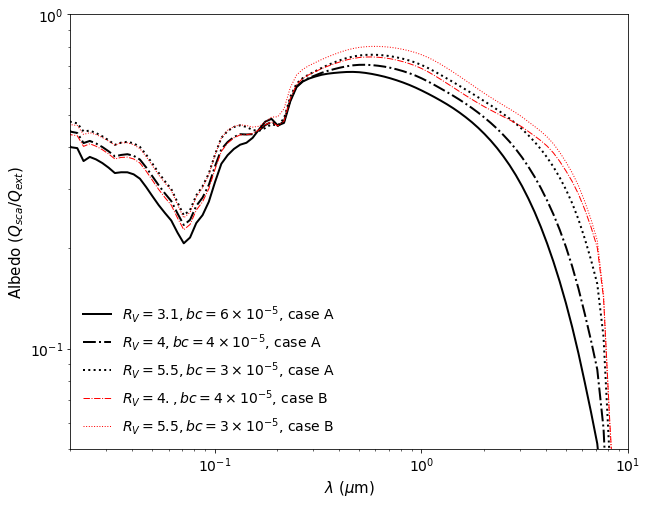

In [ ]:
# Plot extinction curves
plt.figure( figsize=(10,8) )
ax = plt.subplot(111)

ax.plot(lambda_, y1_scat/y1_ext, 'k-', lw=2, alpha=1, label=r'$R_V=3.1, bc=6 \times 10^{-5}$, case A')
ax.plot(lambda_, y2_scat/y2_ext, 'k-.', lw=2, alpha=1, label=r'$R_V=4, bc=4 \times 10^{-5}$, case A')
ax.plot(lambda_, y3_scat/y3_ext, 'k:', lw=2, alpha=1, label=r'$R_V=5.5, bc=3 \times 10^{-5}$, case A')

ax.plot(lambda_, y4_scat/y4_ext, 'r-.', lw=1, alpha=1, label=r'$R_V=4., bc=4 \times 10^{-5}$, case B')
ax.plot(lambda_, y5_scat/y5_ext, 'r:', lw=1, alpha=1, label=r'$R_V=5.5, bc=3 \times 10^{-5}$, case B')

# ax.text(1., 0.1, 'Case A', fontsize=14)

ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\lambda$ ($\mu$m)', size=15)
ax.set_ylabel(r'Albedo ($Q_{sca}/Q_{ext}$)', size=15)

plt.legend(loc='lower left', frameon=False, fontsize=14)
plt.loglog()
# plt.xscale('log')
plt.xlim(0.02, 10.)
plt.ylim(0.05, 1.)
# plt.grid()
plt.show()